## Final Project DATA-604
### Simulation of a general physician office
#### Deepak Mongia - 07/12/2020

This Jupyter Notebook is the final project for Data-604. We are simulating a simple general physician office. We will start with some system parameters like average arrival rate, average patient service rate, reception time, and so on.
The starting time would be Zero, and the end time would be 8 hours that means the clinic remains open for 8 hours for the new patients to come in. Once the 8 hours time is complete, the patients who have already signed in will still be seen, but new patients will not be enrolled after 8 hours.

#### Main features considered:
1) Average arrival Rate

2) Average patient service rate

3) reception - minimum and maximum time

4) Patients with appointment - we have considered that every 5th patient will be with appointment. We will be updating it to appointment at regular intervals of time - like there is a patient with appointment at the start of every hour.

5) Patients will not be allowed to enter the queue after 8 hours as the clinic will closed for new patients after 8 hours

6) Number of doctors has been taken as a fixed variable to see how the queue will change

Importing the libraries

In [1]:
import numpy as np
import simpy
import matplotlib.pyplot as plt

Setting up the system variables

In [2]:
ARRIVAL_RATE = 15             # 15 patients come per hour
PATIENT_SERVICE_RATE = 16     # 16 patients can be taken care per hour by the facility
RECEPTION_TIME_MIN = 2/60    # 2 minutes is the minimum limit at the reception
RECEPTION_TIME_MAX = 5/60    # 5 minutes is the maximum limit at the reception
EVERY_NUMBER_PATIENT_WITH_APPOINTMENT = 5   # every 5th patient is the patient with appointment
NO_OF_DOCTORS = 1            # number of doctors = 1
NO_OF_RECEPTION = 1          # number of reception = 1
OBSERVE_INTERVAL_TIME = 0.5  # interval time in hours - for observations

Setting up generate time interval functions for our system

In [3]:
def generate_interarrival():
    return np.random.exponential(1/ARRIVAL_RATE)

In [4]:
def generate_patient_service():
    return np.random.exponential(1/PATIENT_SERVICE_RATE)

In [5]:
def generate_reception_service():
    return np.random.uniform(RECEPTION_TIME_MIN/60, RECEPTION_TIME_MAX/60)

Defining the main process which generates the new patients.

Assumption: Every 5th patient is a patient with appointment

In [6]:
def outpatient_run(env, doctors, reception):
    i = 0
    while True:
        yield env.timeout(generate_interarrival())
        i += 1
        #yield env.process(patient(env, i, doctors))
        #env.process(process_patient(env, i, doctors, reception))
        if i % EVERY_NUMBER_PATIENT_WITH_APPOINTMENT == 0:
            env.process(process_patient(env, i, doctors, reception, priority=-1))
        else:
            env.process(process_patient(env, i, doctors, reception))
        

Defining the patient process. This process will request for the doctors - resource which is a priority resource. Once the doctor resource is received, the process will simulate the doctor treatment.

There is a reception request as well in this process.

In [7]:
wait_t = []
treatment_time = []

In [8]:
def process_patient(env, i, doctors, reception, priority=0):
    with doctors.request(priority=priority) as request:
        if env.now < 8:
            print ("patient %d arriving at %.5f" %(i, env.now))
            t_arrival = env.now
            with reception.request(priority=priority) as rec_req:
                yield rec_req
                print ("patient %d reception start at %.5f" %(i, env.now))
                t_rec_start = env.now
                yield env.timeout(generate_reception_service())
                print ("patient %d reception end at %.5f" %(i, env.now))
                t_doc_wait_start = env.now

            yield request
            print ("patient %d is being treated at %.5f" %(i, env.now))
            t_start_treatment = env.now
            yield env.timeout(generate_patient_service())
            print ("patient %d departing at %.5f" %(i, env.now))
            t_end_treatment = env.now

            wait_t.append((t_start_treatment - t_doc_wait_start) + (t_rec_start - t_arrival))
            treatment_time.append(t_end_treatment - t_start_treatment)

### Monitoring

We will monitor the queue length - how the queue will look like as the time progresses

In [9]:
obs_times = []
q_length = []
#queue_data = []
rec_q_length = []

In [10]:
def observe(env, doctors, reception):
    while True:
        obs_times.append(env.now)
        q_length.append(len(doctors.queue))
        rec_q_length.append(len(reception.queue))
        yield env.timeout(OBSERVE_INTERVAL_TIME)

In [11]:
np.random.seed(1)

In [12]:
env = simpy.Environment()

In [13]:
doctors = simpy.PriorityResource(env, capacity=NO_OF_DOCTORS)

In [14]:
reception = simpy.PriorityResource(env, capacity=NO_OF_RECEPTION)

In [15]:
proc1 = env.process(outpatient_run(env, doctors, reception))
env.process(observe(env, doctors, reception))

<Process(observe) object at 0x233d4c66550>

In [16]:
env.run(until=10)

patient 1 arriving at 0.03597
patient 1 reception start at 0.03597
patient 1 reception end at 0.03653
patient 1 is being treated at 0.03653
patient 1 departing at 0.05903
patient 2 arriving at 0.12092
patient 2 reception start at 0.12092
patient 2 reception end at 0.12155
patient 2 is being treated at 0.12155
patient 3 arriving at 0.13150
patient 3 reception start at 0.13150
patient 3 reception end at 0.13238
patient 2 departing at 0.13443
patient 3 is being treated at 0.13443
patient 4 arriving at 0.15976
patient 4 reception start at 0.15976
patient 4 reception end at 0.16089
patient 3 departing at 0.18280
patient 4 is being treated at 0.18280
patient 5 arriving at 0.19598
patient 5 reception start at 0.19598
patient 5 reception end at 0.19656
patient 4 departing at 0.19710
patient 5 is being treated at 0.19710
patient 5 departing at 0.26648
patient 6 arriving at 0.33630
patient 6 reception start at 0.33630
patient 6 reception end at 0.33732
patient 6 is being treated at 0.33732
patie

patient 104 departing at 7.97879
patient 125 is being treated at 7.97879
patient 125 departing at 8.26963
patient 106 is being treated at 8.26963
patient 106 departing at 8.33290
patient 107 is being treated at 8.33290
patient 107 departing at 8.65175
patient 108 is being treated at 8.65175
patient 108 departing at 8.73731
patient 109 is being treated at 8.73731
patient 109 departing at 8.81105
patient 111 is being treated at 8.81105
patient 111 departing at 8.88444
patient 112 is being treated at 8.88444
patient 112 departing at 9.17073
patient 113 is being treated at 9.17073
patient 113 departing at 9.27089
patient 114 is being treated at 9.27089
patient 114 departing at 9.30086
patient 116 is being treated at 9.30086
patient 116 departing at 9.38747
patient 117 is being treated at 9.38747
patient 117 departing at 9.43220
patient 118 is being treated at 9.43220
patient 118 departing at 9.63251
patient 119 is being treated at 9.63251
patient 119 departing at 9.67160
patient 121 is bei

In [17]:
wait_t_minutes = [i*60 for i in wait_t]

Text(0, 0.5, 'count')

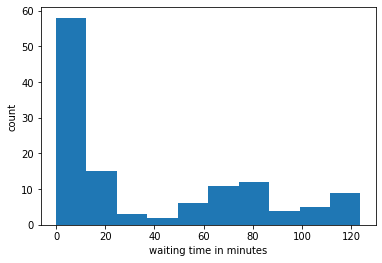

In [18]:
plt.figure()
plt.hist(wait_t_minutes)
plt.xlabel("waiting time in minutes")
plt.ylabel("count")

Text(0, 0.5, 'queue length')

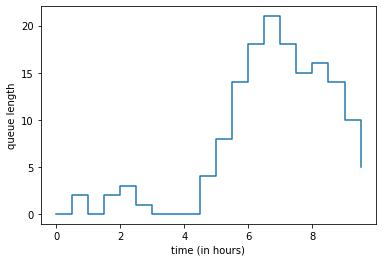

In [19]:
plt.figure()
plt.step(x=obs_times, y=q_length, where='post')
plt.xlabel("time (in hours)")
plt.ylabel("queue length")

In [20]:
q_length

[0, 2, 0, 2, 3, 1, 0, 0, 0, 4, 8, 14, 18, 21, 18, 15, 16, 14, 10, 5]

In [21]:
obs_times

[0,
 0.5,
 1.0,
 1.5,
 2.0,
 2.5,
 3.0,
 3.5,
 4.0,
 4.5,
 5.0,
 5.5,
 6.0,
 6.5,
 7.0,
 7.5,
 8.0,
 8.5,
 9.0,
 9.5]

In [22]:
rec_q_length

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [23]:
treatment_time

[0.022500797178369933,
 0.012882164630130033,
 0.04837248592879734,
 0.014295275470426888,
 0.06938002040603955,
 0.009454557473870973,
 0.21563920060685637,
 0.0735785371812443,
 0.02369309188560531,
 0.07249742987659058,
 0.1124714824641726,
 0.020570057051708446,
 0.09732636587929899,
 0.006809462934418642,
 0.037125897746432934,
 0.02121011760298419,
 0.07098762053876162,
 0.055619108733453215,
 0.033408189770237406,
 0.0740924211134204,
 0.047977968035141316,
 0.18081756453144204,
 0.011296739518032561,
 0.16401794215097376,
 0.02681809326554352,
 0.019663248207118178,
 0.20924047169579119,
 0.007617539934396511,
 0.05397960301573601,
 0.032779984784247596,
 0.01690828806630007,
 0.14606028486074196,
 0.060006170371524004,
 0.14948753397300685,
 0.1657032914837684,
 0.004267439105035908,
 0.08802430421146568,
 0.08762003567026122,
 0.008293659575877133,
 0.0012550251492937647,
 0.01766518004187878,
 0.05029990660490924,
 0.020460683128939117,
 0.05145779405310513,
 0.0165771835563

In [24]:
env.now

10

In [25]:
sum(treatment_time)

8.824990030221224

Running it again for 2 doctors now

In [26]:
wait_t = []
treatment_time = []

In [27]:
obs_times = []
q_length = []
#queue_data = []
rec_q_length = []

In [28]:
NO_OF_DOCTORS2 = 2            # number of doctors = 2

In [29]:
np.random.seed(1)

In [30]:
env2 = simpy.Environment()

In [31]:
doctors2 = simpy.PriorityResource(env2, capacity=NO_OF_DOCTORS2)

In [32]:
reception2 = simpy.PriorityResource(env2, capacity=NO_OF_RECEPTION)

In [33]:
proc2 = env2.process(outpatient_run(env2, doctors2, reception2))
env2.process(observe(env2, doctors2, reception2))

<Process(observe) object at 0x233d79679e8>

In [34]:
env2.run(until=10)

patient 1 arriving at 0.03597
patient 1 reception start at 0.03597
patient 1 reception end at 0.03653
patient 1 is being treated at 0.03653
patient 1 departing at 0.05903
patient 2 arriving at 0.12092
patient 2 reception start at 0.12092
patient 2 reception end at 0.12155
patient 2 is being treated at 0.12155
patient 3 arriving at 0.13150
patient 3 reception start at 0.13150
patient 3 reception end at 0.13238
patient 3 is being treated at 0.13238
patient 2 departing at 0.13443
patient 4 arriving at 0.15976
patient 4 reception start at 0.15976
patient 4 reception end at 0.16089
patient 4 is being treated at 0.16089
patient 4 departing at 0.17518
patient 3 departing at 0.18075
patient 5 arriving at 0.19598
patient 5 reception start at 0.19598
patient 5 reception end at 0.19656
patient 5 is being treated at 0.19656
patient 5 departing at 0.26594
patient 6 arriving at 0.33630
patient 6 reception start at 0.33630
patient 6 reception end at 0.33732
patient 6 is being treated at 0.33732
patie

patient 99 reception start at 7.24914
patient 99 reception end at 7.25001
patient 99 is being treated at 7.25001
patient 100 arriving at 7.25385
patient 100 reception start at 7.25385
patient 100 reception end at 7.25456
patient 100 is being treated at 7.25456
patient 99 departing at 7.25520
patient 100 departing at 7.35897
patient 101 arriving at 7.52477
patient 101 reception start at 7.52477
patient 101 reception end at 7.52590
patient 101 is being treated at 7.52590
patient 101 departing at 7.57858
patient 102 arriving at 7.66338
patient 102 reception start at 7.66338
patient 102 reception end at 7.66433
patient 102 is being treated at 7.66433
patient 103 arriving at 7.67508
patient 103 reception start at 7.67508
patient 103 reception end at 7.67613
patient 103 is being treated at 7.67613
patient 102 departing at 7.69079
patient 104 arriving at 7.69208
patient 104 reception start at 7.69208
patient 104 reception end at 7.69339
patient 104 is being treated at 7.69339
patient 103 depa

In [35]:
wait_t

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.10610038530222288,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.022499025200648726,
 0.04573451879253776,
 0.045386643277204985,
 0.0,
 0.016817616474494423,
 0.02130842390101173,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.027332291576597445,
 0.0588753049064592,
 0.0695776419453118,
 0.002731758098556636,
 0.000774650770270835,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.041608270185578,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.05439798515216676,
 0.057198347410495565,
 0.0,
 0.09634765705575177,
 0.061944261723563265,
 0.1303503617849362,
 0.030161508753892008,
 0.10803003578969861,
 0.1121865106369091,
 0.02219397167599446,
 0.029531742138657613,
 0.0,
 0.0,
 0.0,
 0.0,
 0.007163478236623,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.12047285829128818,
 0.0,
 0.15081214895193362,
 0.07870189897265689,
 0.09840488570183581,
 0.038922859882283944,
 0.0,
 0.0,
 0.

In [36]:
wait_t_minutes = [i*60 for i in wait_t]

Text(0, 0.5, 'count')

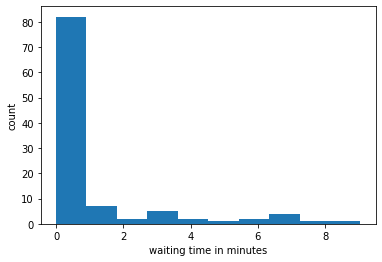

In [37]:
plt.figure()
plt.hist(wait_t_minutes)
plt.xlabel("waiting time in minutes")
plt.ylabel("count")

Text(0, 0.5, 'queue length')

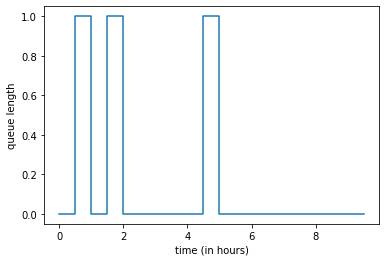

In [38]:
plt.figure()
plt.step(x=obs_times, y=q_length, where='post')
plt.xlabel("time (in hours)")
plt.ylabel("queue length")

In [39]:
q_length

[0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [40]:
rec_q_length

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

### Conclusion:
1. From the above testing for 1 doctor and 2 doctors - it is evident that when the facility has 2 doctors, the queue is almost 0 all the time
2. Also, adding more reception staff won't help in either case, as reception queue length is 0 at most of the observation time intervals